# Análisis de los 25 retailers más grandes de Estados Unidos

In [1]:
# Importar librerías aquí
import pandas as pd # librería para el manejo e importación de datos
import matplotlib.pyplot as plt # librería para graficar
import numpy as np # librería para optimización de operaciones con datos
import seaborn as sns # librería avanzada para gráficos

In [202]:
import os

archivos = os.listdir()
print(archivos)
print(os.getcwd())

['data', 'project.ipynb', 'template_proyecto_datacademy.ipynb']
d:\platzi\datacademy


In [203]:
# Importar datos aquí
df_retail_us = pd.read_csv('data/largest_us_retailers.csv')
df_retail_us.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


## I. Preguntas del negocio

Las estadísticas descriptivas están influidas en gran medida por la calidad de la información, es decir, debemos poder garantizar que la información ha sido verificada y validada; para ello se suele comprobar si la información contiene valores faltantes y se revisa la carácterisita de las variables (categóricas, númericas, etc...).

En este sentido se evaluará la cantidad de valores faltantes y la naturaleza de las variables (para definir cual es la mejor métrica para cada tipo de variable).


In [26]:
# Valores faltates presentes en la información
df_retail_us.isnull().sum(axis = 0)/len(df_retail_us)*100

# Number of missing in each column
missing = pd.DataFrame(df_retail_us.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['porcentaje'] = missing['total'] / len(df_retail_us) *100
missing

,total,porcentaje
Company,0,0.0
Sales,0,0.0
Stores,2,8.0
Sales/Avg. Store,2,8.0
Store Count Growth,2,8.0
Category,1,4.0


Como se aprecia en la tabla anterior las variables cantidad de tiendas físicas (Stores), promedio de venta por tienda física (Sales/Avg. Store), crecimiento del número de tiendas (Store Count Growth) y categória (Category) presentan **valores faltantes** alrededor del 8%. Es importante conocer este resultado, ya que en el calculo de cada métrica debemos tener en cuenta los valores faltantes para evitar malas interpetaciones. Ahora, se analiza el tipo de variables existentes en la información. 

In [28]:
df_retail_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             25 non-null     object 
 1   Sales               25 non-null     int64  
 2   Stores              23 non-null     float64
 3   Sales/Avg. Store    23 non-null     float64
 4   Store Count Growth  23 non-null     float64
 5   Category            24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ KB


In [30]:
df_retail_us['Category'].head()

0        Supercenters
1             Grocery
2      Warehouse Club
3    Home Improvement
4         Drug Stores
Name: Category, dtype: object

De lo anterior podemos realizar el diccionario de datos para un mejor entendimiento.
### Diccionario de Datos
- Compañía (Company): variable cualitativa nominal.
- Ventas en millones de dólares (Sales): variable cuantitativa continua (aunque python la reconoce como discreta).
- Cantidad de tiendas físicas (Stores): variable cuantitativa discreta.
- Promedio de venta por tienda física (Sales/Avg. Store): variable cuantitativa continua.
- Crecimiento del número de tiendas (Store Count Growth): variable cuantitativa continua.
- Categória (Category): variable cualitativa nominal

Si bien python no está reconociendo las variables en el tipo adecuado, por ahora no se cambiará, pero si se tendrán en cuenta a la hora de elaborar los gráficos correspondientes.

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

Para determinar la **compañía dominante**, se definirá como la compañía de mayores ventas (no la de mayores tiendas físicas o virtuales o de mayor crecimiento). En este sentido, a continuación se visualiza la **compañía dominante**

In [57]:
df_sorted = df_retail_us.sort_values('Sales', ascending=0)
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


In [44]:
from matplotlib import style
style.use('default')

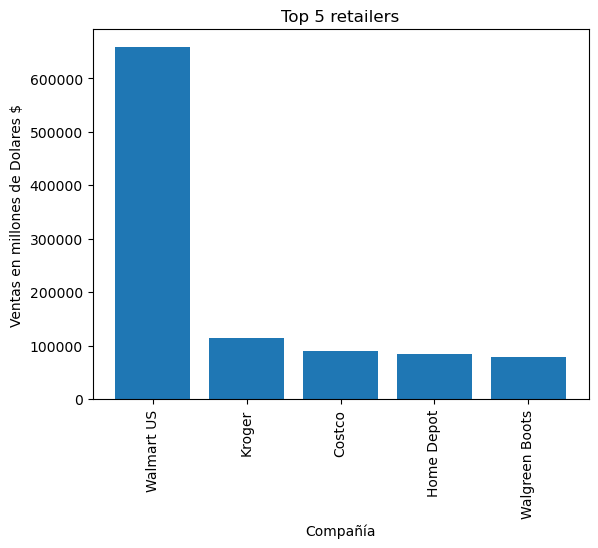

In [59]:
x = df_sorted['Company'][0:5] #Aplicamos slicing como en una lista de Python.
y = df_sorted['Sales'][0:5]

plt.figure()
plt.bar(x, y)
plt.title('Top 5 retailers')
plt.xlabel('Compañía')
plt.ylabel('Ventas en millones de Dolares $')
plt.xticks(rotation='vertical') # Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

El anterior gráfico nos muestra que la compañia dominante es **Walmart US** si comparamos las ventas. Ahora, es importante determinar como es el comportamiento de las demás compañías omitiendo la compañía dominante, esto para brindarnos un mejor panorama de lo que está sucediendo con el sector retail para US y poder determinar si es posible entrar en este mercado como compañía nueva.

In [68]:
#indexing
df_filtrando_dominante = df_retail_us[df_retail_us['Company'] != 'Walmart US']
df_filtrando_dominante["Sales"].mean()

46602.416666666664

El promedio de ventas omitiendo la compañía dominante es de **$46602.41 millones de dólares**, esto es un gran avance, ya que permite establecer una linea para entrar en el mercado. Un negocio en el sector retail en USA es **competitivo** si puede lograr ventas alrededor de esa cantidad. Por otro lado, **negocios rentables** y por debajo de dicho promedio se pueden considerar como empresas en crecimiento y que son nuevas.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

In [69]:
df_filtrando_dominante['Sales'].sum()

1118458

In [209]:
df_retail_us['Sales'].describe()

count        25.000000
mean      71063.080000
std      125405.727644
min       16592.000000
25%       24402.000000
50%       34980.000000
75%       71687.000000
max      658119.000000
Name: Sales, dtype: float64

El dinero en ventas que generó todas las compañías fue de $1118458 millones de dólares, indicando que el sector retail es un sector que genera una gran cantidad de dinero y puede ser importante entrar en este tipo de mercados. A continuación, se analizará las ventas de mayor frecuencia, este es un indicador de lo que están vendiendo actualmente las compañías. Además, para una mejor interpretación se calcula el rango intercuartilico, este también es un indicador del rango en el cual una compañía debería tener sus ventas apra tener competitividad en el sector retaíl. Como medida de tendencia central, se utiliza la mediana (aún incluyendo la compañía dominante), las ventas promedias están alrededor de los $34980 millones de dólares.

(array([11.,  3.,  3.,  4.,  2.,  1.]),
 array([ 16592. ,  32999.5,  49407. ,  65814.5,  82222. ,  98629.5,
        115037. ]),
 <BarContainer object of 6 artists>)

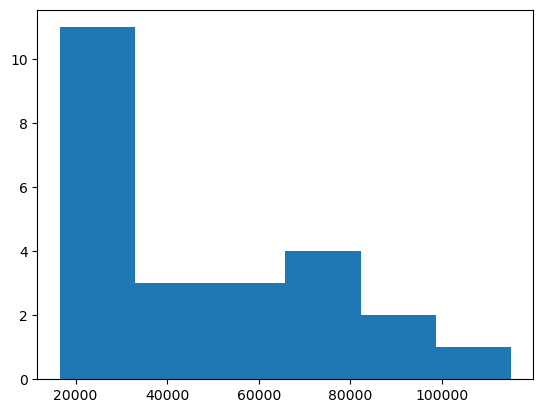

In [207]:
plt.hist(df_filtrando_dominante['Sales'], bins='sturges')
# plt.hist(your_plot, bins="sturges")

C:\Users\jeison.mesa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

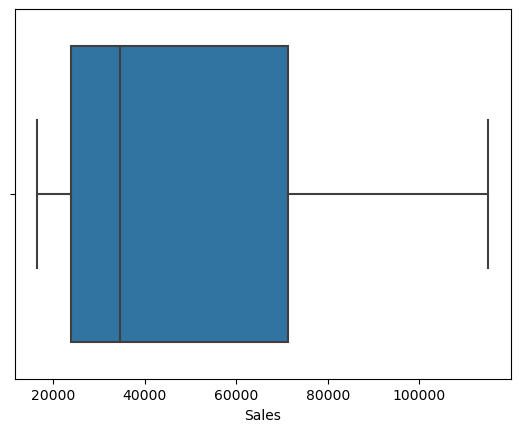

In [208]:
sns.boxplot('Sales', data = df_filtrando_dominante) # no se evidencia en los datos valores atípicos

- La mayoría de las compañías venden alrededor de $16592 y $32999.5 millones de dólares (filtrando la compañía dominante).
- Filtrando la compañía dominante no se evidencia posibles valores atípicos.
- La distribución de las ventas es sesgada a la izquierda, indicando la aparición o crecimiento de nuevas compañías.
- Alta variabilidad en las ventas de las distintas compañías, siendo esta $125405 millones de dólares.
- Para ser una empresa competitiva es necesario tener ventas entre los $24402 y $71687 millones de dólares.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

In [71]:
df_filtrando_dominante['Stores'].sum() # total de tiendas

75157.0

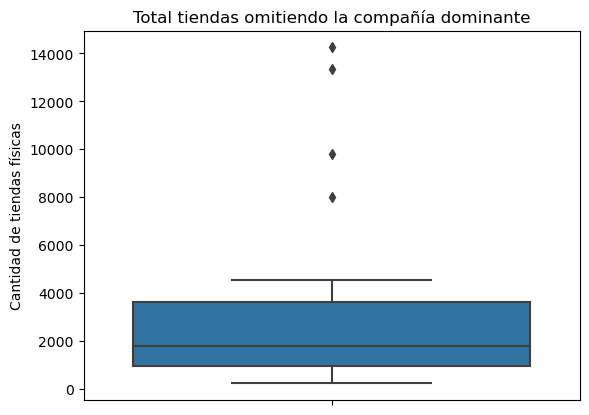

In [77]:
sns.boxplot( y=df_filtrando_dominante["Stores"] )
plt.ylabel("Cantidad de tiendas físicas")
plt.title('Distribución tiendas omitiendo la compañía dominante')
plt.show()

In [75]:
df_filtrando_dominante['Stores'].mean() 

3416.2272727272725

In [78]:
df_retail_us[df_retail_us['Company'] == 'Walmart US']

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


- **la cantidad de tiendas** que tiene la mayoría de las compañías es 75,157.
- No hay evidencia en la información de posibles **valores atípicos**.
- El promedio de tiendas por compañía es alrededor de **3,416**.
- Empresas que deseén ser **competitivas** deberán tener un número de tiendas alrededor de 3,416.
- La empresa dominante tiene 4574 tiendas físicas.


### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

Dado que la variable **cantidad de tiendas físicas (Stores)** debe relacionarse con una variable que responda a las ventas en tiendas físicas, en este caso es la variable **promedio de venta por tienda física (Sales/Avg. Store)**

In [83]:
print(df_filtrando_dominante['Sales'].mean())
print(df_retail_us['Sales'].mean())

46602.416666666664
71063.08


Text(0.5, 1.0, 'Relación entre la cantidad de tiendas físicas vs el promedio de venta por tienda física')

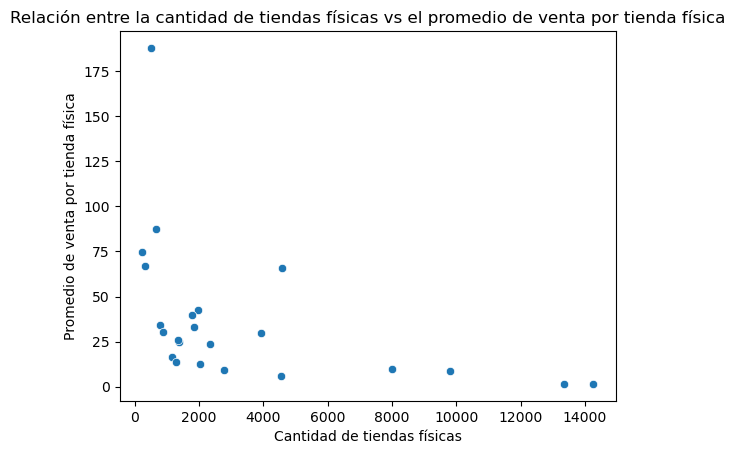

In [80]:
sns.scatterplot(x = "Stores", y = "Sales/Avg. Store", data = df_retail_us)
plt.xlabel("Cantidad de tiendas físicas")
plt.ylabel("Promedio de venta por tienda física")
plt.title("Relación entre la cantidad de tiendas físicas vs el promedio de venta por tienda física")

Text(0.5, 1.0, 'Omitiendo la compañía dominante')

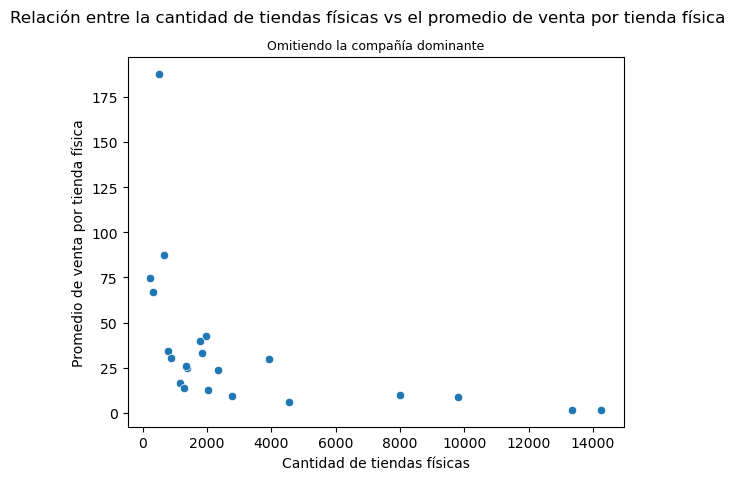

In [90]:
sns.scatterplot(x = "Stores", y = "Sales/Avg. Store", data = df_filtrando_dominante)
plt.xlabel("Cantidad de tiendas físicas")
plt.ylabel("Promedio de venta por tienda física")
plt.suptitle("Relación entre la cantidad de tiendas físicas vs el promedio de venta por tienda física")
plt.title("Omitiendo la compañía dominante", fontsize=9)

- La relación entre las dos variables es **negativa según las anteriores gráficas, a mayor cantidad de tiendas físicas menores promedio de venta.
- La relación puede indicar que el sector cada vez es más digítal, indicando que los compradores pueden preferir medios virtuales para sus compras.

### 5. ¿Cuál es el rango que existe entre las ventas?

In [91]:
df_retail_us['Sales'].max() - df_retail_us['Sales'].min()

641527

- Las ventas del sector retail representan una **variabilidad máxima** de $641527 millones de dolares
- Lo anterior puede deberse a la existencia de empresas nuevas que comienzan en este sector y a empresas que ya llevan un buen tiempo y están establecidas.

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [98]:
## Empresas que más tiendas físicas tienen
df_top_tiendas = df_retail_us.sort_values('Stores', ascending = 0 )[0:5]
top_tiendas = df_top_tiendas['Company']
df_top_tiendas

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


Para determinar cuales de las anteriores tiendas físicas estuvieron dentro de las 5 empresas que más ventas tuvieron vamos a considerar las siguientes variables:
- Ventas en millones de dólares (Sales).
- Promedio de venta por tienda física (Sales/Avg. Store).

In [104]:
top_ventas = df_retail_us.sort_values('Sales', ascending = 0 )[0:5]

top_ventas[top_ventas['Company'].isin(top_tiendas)] # compañías que más tiendas físicas tienen y se encuentran en las 5 compañías que más venden


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [105]:
top_ventas = df_retail_us.sort_values('Sales/Avg. Store', ascending = 0 )[0:5]

top_ventas[top_ventas['Company'].isin(top_tiendas)] # compañías que más tiendas físicas tienen y se encuentran en las 5 compañías que más venden en promedio por tienda física


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


- Las 5 empresas que más tiendas físicas tienen son: Dollar Tree, Dollar General, CVS incl. Target, Walgreen Boots y Walmart US.
- Las compañías Walmart US y Walgreen son las compañías que se encuentran en el top de mayor tiendas físicas y mayores ventas.
- La única compañía que se encuentra en el top de más tiendas físicas y a la vez más ventas en promedio por tiene física es Walmart US.
   

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

Text(0.5, 1.0, 'Compañías que más ventas generaron')

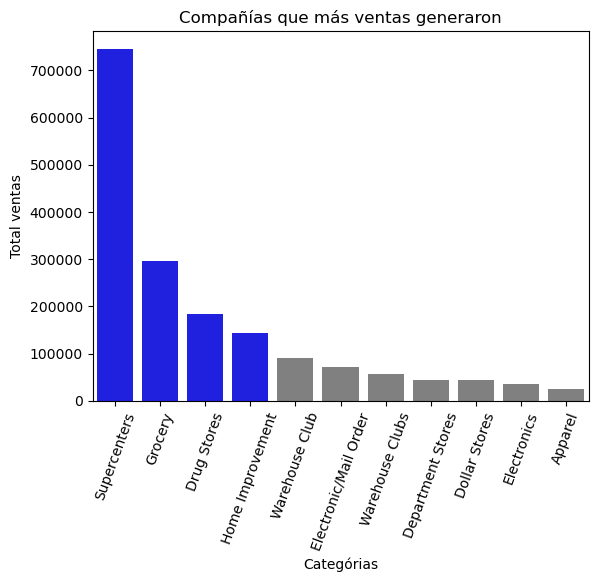

In [161]:
top_categorias = df_retail_us.groupby('Category')['Sales'].agg(total_ventas=np.sum).reset_index().sort_values('total_ventas', ascending = 0)
#top_categorias['Category']
clrs = ['blue', 'blue', 'blue', 'blue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey'] 
sns.barplot(x = 'Category', y = 'total_ventas', data = top_categorias, palette=clrs)
plt.xticks(rotation=70)
plt.xlabel("Categórias")
plt.ylabel("Total ventas")
plt.title("Compañías que más ventas generaron")

Las categórias que más ventas generaron fueron:
- Supercenters
- Grocery
- Drug Stores
- Home Improvement

Para una empresa que quiera entrar en la competencia podrá elegir una de estas categorías ya que son las preferencias de los clientes, en particular **Supercenters**

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [165]:
df_retail_us[df_retail_us['Sales/Avg. Store'] > 175]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
2,Costco,90048,495.0,187.79562,0.06681,Warehouse Club


Text(0, 0.5, 'Ventas en millones de dólares $')

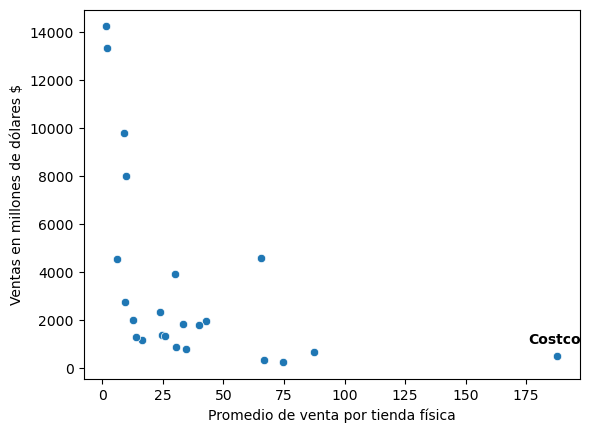

In [167]:
sns.scatterplot(y = "Stores", x = "Sales/Avg. Store", data = df_retail_us)
plt.text(176, 1000, "Costco", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.xlabel('Promedio de venta por tienda física')
plt.ylabel('Ventas en millones de dólares $')
plt.title('Relación de tiendas físicas versus promedio de venta por tienda física')

- La compañía Costco es la compañía que en relación con sus tiendas físicas genera más ventas promedio por tienda física.

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

La variable promedio de venta por tienda física trae intrinsecamente aquellas compañías cuyas ventas sea de forma exclusivamente online, ya que aquellas que tengan $0 dólares en ventas significa que toda su actividad es basada en recursos digitales.

In [196]:
df_solo_online = df_retail_us[df_retail_us['Sales/Avg. Store'].isna()]
df_solo_online

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN


In [197]:
df_solo_online['Sales'].mean()

54675.5

In [198]:
solo_online_companias = solo_online['Company'].tolist()

df_retail_nonline = df_retail_us[~df_retail_us['Company'].isin(solo_online_companias)]
df_retail_nonline['Sales'].mean()

['Amazon', 'Apple incl. Online']


72488.08695652174

In [201]:
# filtrando Walmart US
df_retail_nonline[df_retail_nonline['Company'] != 'Walmart US']['Sales'].mean()

45868.5

- Las compañías que venden de forma exclusivamente online son: **Amazon** y **Apple incl. Online**
- Las compañías que venden de forma exclusivamente online no alcanzan las ventas promedios de las competidoras con tiendas físicas.
- Cuando se filtra la compañía dominante (Walmart US), las compañías que venden exclusivametne online tienen ventaja competitiva frente a las tiendas que también venden en tiendas físicas.


## III. Tus propias preguntas

### 10. ¿Qué categorías está teniendo crecimiento?

Text(0.5, 1.0, 'Categórias en crecimiento')

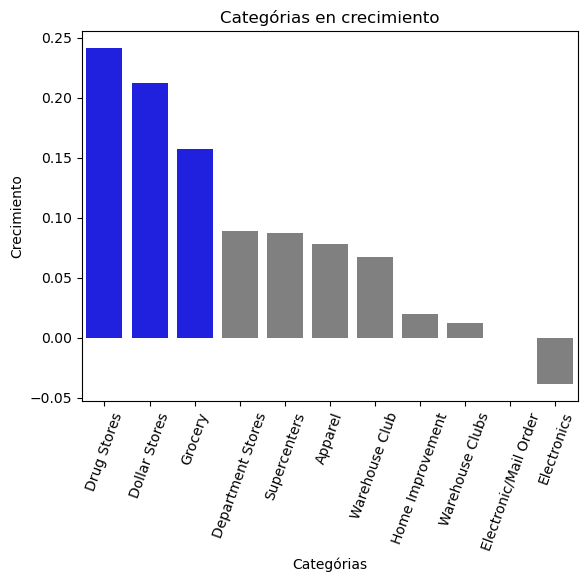

In [222]:
df_crecimiento = df_retail_us.groupby('Category')['Store Count Growth'].agg(Crecimiento = np.sum).reset_index().sort_values('Crecimiento', ascending = 0)

clrs = ['blue', 'blue', 'blue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey'] 
sns.barplot(x = 'Category', y = 'Crecimiento', data = df_crecimiento, palette=clrs)
plt.xticks(rotation=70)
plt.xlabel("Categórias")
plt.ylabel("Crecimiento")
plt.title("Categórias en crecimiento")

### 11. Pregunta

### 12. Pregunta

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=edc68bfa-8df4-47a4-8622-860ebb931fe9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>